# Prueba de modelos de predicción con One Hot Encoding

En este Notebook, se procede a probar diferentes modelos que puedan servirnos como base para la creación del modelo o modelos finales que se usarán en la herramienta SNPTool.

Exploraremos varios tipos de modelos. Los dos candidatos más posibles para ser buenos tipos de modelos son los Random Forest Classifier y XGBoost, ya que poseen buenas cualidades para el análisis de datos bioestadísticos.

Así mismo, probaremos por un lado modelos con y sin aminoácidos.

## Importamos los datasets y las librerías 

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
from joblib import dump
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Evitamos que imprima por pantalla los Warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\alejs\OneDrive\Documentos\GitHub\TFG\datasets\model_dataset.csv")

# Modelo de clasificación con One Hot Encoding

Utilizaremos las columnas: 
    
    -'hg19_chr' (código del cromosoma)
    -'hg19_pos(1-based)' (posición dentro del cromosoma)
    -'ref' (código de referencia de la base inicial) (One hot Encoding)
    -'alt' (código de referencia de la base producida) (One hot Encoding)
    -'aaref' (código de referencia del aminoácido inicial) (One hot Encoding)
    -'aaalt' (código de referencia del aminoácido producido) (One hot Encoding)
    
Para detectar si es o no patógeno. La columna target es la columna 'patho', la cual vale 0 si proviene del dataset benign, y 1 si procede del dataset patho

## Random Forest Classifier con aminoácidos

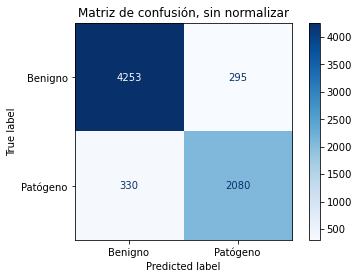

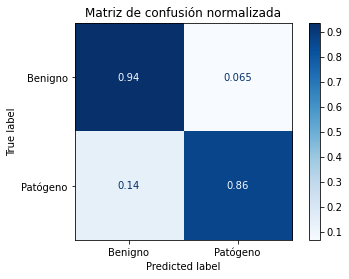

Ranking de características:
1. columna hg19_pos(1-based) (0.471439)
2. columna aaref_R (0.023244)
3. columna aaref_C (0.017444)
4. columna aaalt_W (0.012807)
5. columna aaref_G (0.012745)
6. columna hg19_chr_2 (0.012230)
7. columna hg19_chr_12 (0.011457)
8. columna hg19_chr_1 (0.011394)
9. columna ref_C (0.011327)
10. columna hg19_chr_3 (0.011318)
11. columna ref_G (0.010778)
12. columna alt_A (0.010505)
13. columna alt_T (0.010493)
14. columna aaalt_C (0.010448)
15. columna hg19_chr_17 (0.010364)
16. columna hg19_chr_7 (0.010168)
17. columna hg19_chr_19 (0.010050)
18. columna alt_C (0.009547)
19. columna hg19_chr_23 (0.009401)
20. columna hg19_chr_8 (0.009126)
21. columna hg19_chr_11 (0.008944)
22. columna hg19_chr_10 (0.008892)
23. columna aaalt_S (0.008783)
24. columna alt_G (0.008769)
25. columna aaalt_R (0.008296)
26. columna hg19_chr_13 (0.008221)
27. columna hg19_chr_16 (0.008157)
28. columna hg19_chr_6 (0.007994)
29. columna ref_T (0.007847)
30. columna ref_A (0.007792)
31. col

In [3]:
refs = [x for x in df.columns if 'ref' in x and x != 'ref_code' and x != 'aaref_code' and x != 'ref' and x != 'aaref']
alts = [x for x in df.columns if 'alt' in x and x != 'alt_code' and x != 'aaalt_code' and x != 'alt' and x != 'aaalt']
chrs = [x for x in df.columns if 'hg19_chr' in x and x != 'hg19_chr']

cols = chrs + ['hg19_pos(1-based)'] + refs + alts

X_1 = df[cols]
y_1 = df[['patho']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=1, test_size=0.2)

features_1 = X_1.columns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

clf_1 = RandomForestClassifier(max_depth=None, random_state=0)
clf_1.fit(X_train_1, y_train_1)

y_pred_1 = clf_1.predict(X_test_1)

titles_options = [("Matriz de confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_1, X_test_1, y_test_1,
                                 display_labels=['Benigno','Patógeno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.savefig(fname="imgs/confusion_matrix/model1_"+title)

plt.show()

importances_1 = clf_1.feature_importances_
indices_1 = np.argsort(importances_1)[::-1]

# Print the feature ranking
print("Ranking de características:")

for f in range(0,len(features_1)):
    print("%d. columna %s (%f)" % (f + 1, features_1[indices_1[f]], importances_1[indices_1[f]]))

Los resultados son bastante buenos:

    - Un 94% de acierto en los valores Benignos y un 86 % en los Patógenos
    
Como podemos ver, la columna más importante con diferencia es la posición dentro del cromosoma frente a otros datos que, en principio, podrían tener importancia como son las bases por las que se intercambian o el propio cromosoma. 

## Random Forest Classifier sin aminoácidos

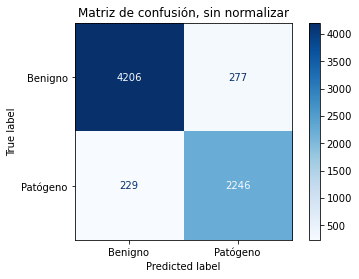

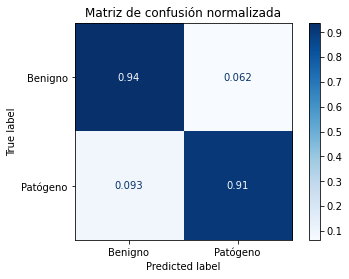

Ranking de características:
1. columna hg19_pos(1-based) (0.846475)
2. columna hg19_chr_8 (0.008131)
3. columna hg19_chr_19 (0.007454)
4. columna hg19_chr_7 (0.007211)
5. columna hg19_chr_17 (0.006940)
6. columna hg19_chr_1 (0.006623)
7. columna hg19_chr_6 (0.006506)
8. columna hg19_chr_2 (0.006471)
9. columna hg19_chr_3 (0.006335)
10. columna ref_C (0.005976)
11. columna ref_T (0.005845)
12. columna ref_G (0.005844)
13. columna alt_T (0.005794)
14. columna hg19_chr_11 (0.005780)
15. columna alt_G (0.005385)
16. columna alt_C (0.005328)
17. columna hg19_chr_10 (0.005245)
18. columna hg19_chr_12 (0.005159)
19. columna alt_A (0.005134)
20. columna ref_A (0.004950)
21. columna hg19_chr_4 (0.004821)
22. columna hg19_chr_9 (0.004272)
23. columna hg19_chr_5 (0.004169)
24. columna hg19_chr_23 (0.004158)
25. columna hg19_chr_16 (0.004009)
26. columna hg19_chr_13 (0.003128)
27. columna hg19_chr_14 (0.002922)
28. columna hg19_chr_18 (0.002746)
29. columna hg19_chr_15 (0.002431)
30. columna hg19_

In [4]:
refs = [x for x in df.columns if 'ref' in x and x != 'ref_code' and x != 'aaref_code' and x != 'ref' and 'aaref' not in x]
alts = [x for x in df.columns if 'alt' in x and x != 'alt_code' and x != 'aaalt_code' and x != 'alt' and  'aaalt' not in x]
chrs = [x for x in df.columns if 'hg19_chr' in x and x != 'hg19_chr']

cols = chrs + ['hg19_pos(1-based)'] + refs + alts

X_4 = df[cols]
y_4 = df[['patho']]

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=0, test_size=0.2)

features_4 = X_4.columns

clf_4 = RandomForestClassifier(max_depth=None, random_state=0)
clf_4.fit(X_train_4, y_train_4)

y_pred_4 = clf_4.predict(X_test_4)

titles_options = [("Matriz de confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_4, X_test_4, y_test_4,
                                 display_labels=['Benigno','Patógeno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.savefig(fname="imgs/confusion_matrix/model4_"+title)

plt.show()

importances_4 = clf_4.feature_importances_
indices_4 = np.argsort(importances_4)[::-1]

# Print the feature ranking
print("Ranking de características:")

for f in range(0,len(features_4)):
    print("%d. columna %s (%f)" % (f + 1, features_4[indices_4[f]], importances_4[indices_4[f]]))

Los resultados son iguales a los obtenidos con los aminoácidos. Esto nos revela que los aminoácidos realmente no tienen una importancia muy grande

## Random Forest Classifier con todas las columnas

El objetivo no es que sea un modelo funcional, si no evaluar qué columnas tienen una mayor importancia dentro de un posible modelo.

### Sin las columnas FLAG

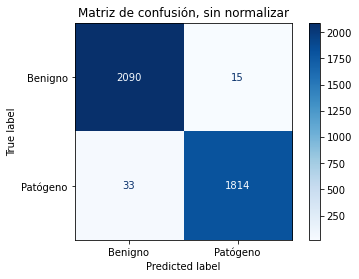

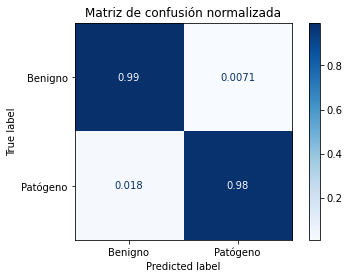

Ranking de características:
1. columna ClinPred_score (0.185278)
2. columna BayesDel_addAF_score (0.111474)
3. columna REVEL_score (0.111005)
4. columna VEST4_score (0.088985)
5. columna BayesDel_noAF_score (0.064560)
6. columna MetaSVM_score (0.058890)
7. columna MVP_score (0.049024)
8. columna SIFT_score (0.047285)
9. columna DEOGEN2_score (0.036018)
10. columna fathmm-XF_coding_score (0.035255)
11. columna MetaLR_score (0.033160)
12. columna SIFT4G_score (0.026923)
13. columna MutationAssessor_score (0.014536)
14. columna LIST-S2_score (0.013353)
15. columna Polyphen2_HVAR_score (0.012850)
16. columna PrimateAI_score (0.011710)
17. columna MPC_score (0.010682)
18. columna PROVEAN_score (0.010643)
19. columna LRT_score_reverted (0.007401)
20. columna FATHMM_score (0.007291)
21. columna LRT_score (0.005335)
22. columna fathmm-MKL_coding_score (0.004852)
23. columna MutationTaster_score (0.004423)
24. columna hg19_pos(1-based) (0.004070)
25. columna Polyphen2_HDIV_score (0.003888)
26. 

In [5]:
refs = [x for x in df.columns if 'ref' in x and x != 'ref_code' and x != 'aaref_code' and x != 'ref' and x != 'aaref']
alts = [x for x in df.columns if 'alt' in x and x != 'alt_code' and x != 'aaalt_code' and x != 'alt' and x != 'aaalt']
chrs = [x for x in df.columns if 'hg19_chr' in x and x != 'hg19_chr']
scores = [x for x in df.columns if 'score' in x and 'normalized' not in x and 'FLAG' not in x]

columns = chrs + ['hg19_pos(1-based)'] + refs + alts + scores + ['patho']

tmp_df = df[columns].dropna(axis=0,how='any')
columns.remove('patho')
X_2 = tmp_df[columns]
y_2 = tmp_df[['patho']]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=1, test_size=0.2)

features_2 = X_2.columns

clf_2 = RandomForestClassifier(max_depth=None, random_state=0)
clf_2.fit(X_train_2, y_train_2)

y_pred_2 = clf_2.predict(X_test_2)

titles_options = [("Matriz de confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_2, X_test_2, y_test_2,
                                 display_labels=['Benigno','Patógeno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.savefig(fname="imgs/confusion_matrix/model2_"+title)

    disp.ax_.set_title(title)

plt.show()

importances_2 = clf_2.feature_importances_
indices_2 = np.argsort(importances_2)[::-1]

print("Ranking de características:")

for f in range(0,len(features_2)):
    print("%d. columna %s (%f)" % (f + 1, features_2[indices_2[f]], importances_2[indices_2[f]]))

Bayes y ClinPred tienen un alto peso; es muy posible que podamos utilizarlos en el caso de que podamos extraer los datos de éste para un posible modelo.

### Con las columnas FLAG

Abro este pequeño apartado de por qué no hago modelos con las columnas FLAGS. Las columnas FLAGS no son más que columnas con un valor binario (Benigno, patógeno) que, para ser predecidas, lo mejor sería utilizar algún tipo de clasificador; esto se vuelve un sinsentido, ya que, las columnas FLAG deberían de representar el mismo valor que la columna PATHO de manera general, por lo que sería el mismo resultado que predecir directamente la columna 'Patho' con los valores de cromosoma, posición, bases y aminoácidos pero con una capa más de complejidad innecesaria.

## Random Forest Regressors de predicción de diferentes scores

El objetivo de este apartado es ver si es posible crear modelos para la predicción de los scores de algunas de las columnas que puedan ser utilizado como input para un modelo predictivo. 
Es importante entender que es complicado hacer uso de alguno de estos modelos si no se obtiene una puntuación muy alta, ya que la desviación de los datos en alguno de estos modelos implicaría el acarreo del error hasta los resultados finales, cosa que tiene que evitarse a toda costa.

In [6]:
refs = [x for x in df.columns if 'ref' in x and x != 'ref_code' and x != 'aaref_code' and x != 'ref' and x != 'aaref']
alts = [x for x in df.columns if 'alt' in x and x != 'alt_code' and x != 'aaalt_code' and x != 'alt' and x != 'aaalt']
chrs = [x for x in df.columns if 'hg19_chr' in x and x != 'hg19_chr']
scores = [x for x in df.columns if 'score' in x and 'norm' not in x and 'FLAG' not in x]
columns = chrs + ['hg19_pos(1-based)'] + refs + alts 
print(columns)

['hg19_chr_1', 'hg19_chr_2', 'hg19_chr_3', 'hg19_chr_4', 'hg19_chr_5', 'hg19_chr_6', 'hg19_chr_7', 'hg19_chr_8', 'hg19_chr_9', 'hg19_chr_10', 'hg19_chr_11', 'hg19_chr_12', 'hg19_chr_13', 'hg19_chr_14', 'hg19_chr_15', 'hg19_chr_16', 'hg19_chr_17', 'hg19_chr_18', 'hg19_chr_19', 'hg19_chr_20', 'hg19_chr_21', 'hg19_chr_22', 'hg19_chr_23', 'hg19_pos(1-based)', 'ref_A', 'ref_C', 'ref_G', 'ref_T', 'aaref_A', 'aaref_C', 'aaref_D', 'aaref_E', 'aaref_F', 'aaref_G', 'aaref_H', 'aaref_I', 'aaref_K', 'aaref_L', 'aaref_M', 'aaref_N', 'aaref_P', 'aaref_Q', 'aaref_R', 'aaref_S', 'aaref_T', 'aaref_V', 'aaref_W', 'aaref_X', 'aaref_Y', 'alt_A', 'alt_C', 'alt_G', 'alt_T', 'aaalt_A', 'aaalt_C', 'aaalt_D', 'aaalt_E', 'aaalt_F', 'aaalt_G', 'aaalt_H', 'aaalt_I', 'aaalt_K', 'aaalt_L', 'aaalt_M', 'aaalt_N', 'aaalt_P', 'aaalt_Q', 'aaalt_R', 'aaalt_S', 'aaalt_T', 'aaalt_V', 'aaalt_W', 'aaalt_X', 'aaalt_Y']


### Columnas score

r2 score de SIFT_score: 0.6054629398510727


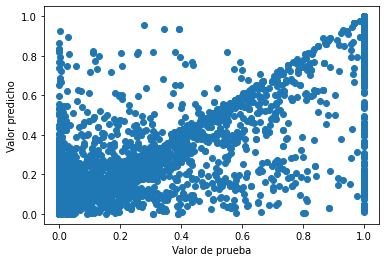

r2 score de SIFT4G_score: 0.6220625941531769


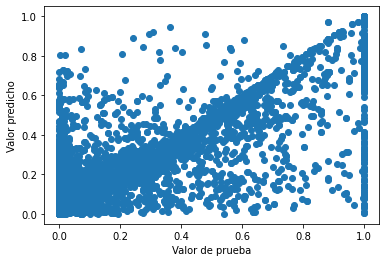

r2 score de Polyphen2_HDIV_score: 0.7059568915599592


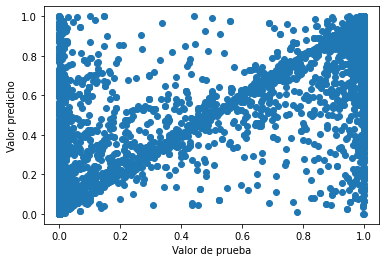

r2 score de Polyphen2_HVAR_score: 0.700973831067845


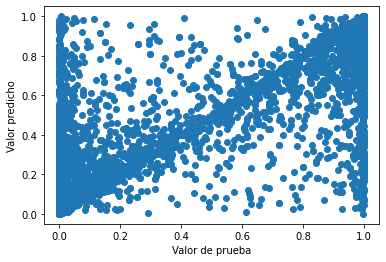

r2 score de LRT_score: 0.5860222030726504


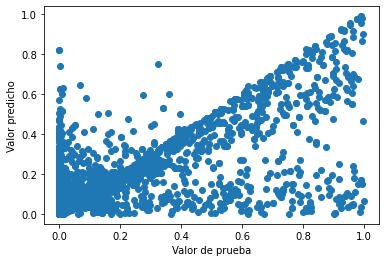

r2 score de MutationTaster_score: 0.582365561510531


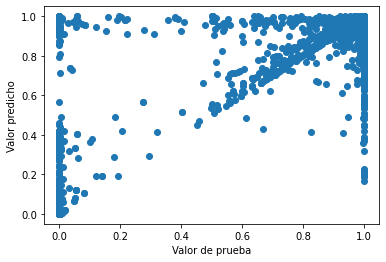

r2 score de MutationAssessor_score: 0.6907906620746807


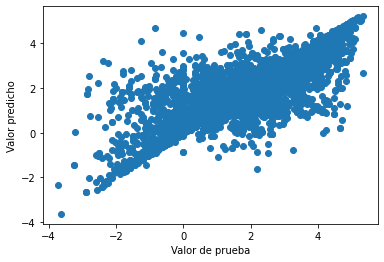

r2 score de FATHMM_score: 0.8488154677367541


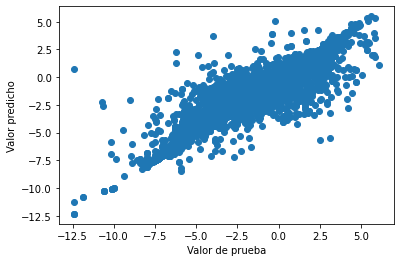

r2 score de PROVEAN_score: 0.75787542727876


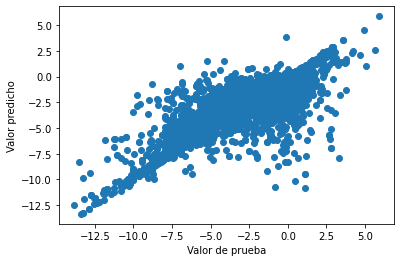

r2 score de VEST4_score: 0.7155018073066917


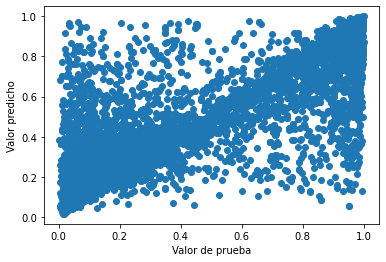

r2 score de MetaSVM_score: 0.793381089020841


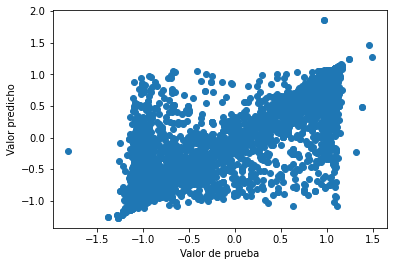

r2 score de MetaLR_score: 0.79523531799105


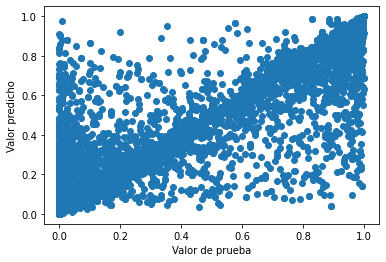

r2 score de REVEL_score: 0.7984216191943447


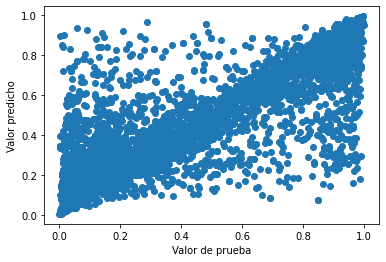

r2 score de MVP_score: 0.7693970981143545


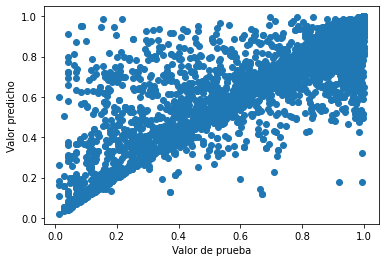

r2 score de MPC_score: 0.825293891425163


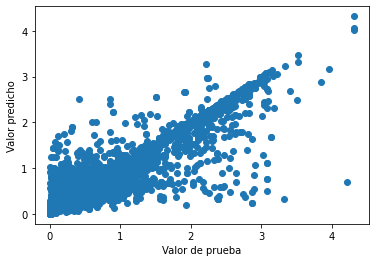

r2 score de PrimateAI_score: 0.7414556952395028


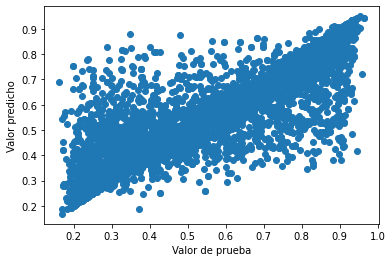

r2 score de DEOGEN2_score: 0.8006473937526783


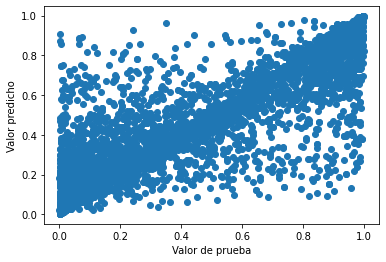

r2 score de BayesDel_addAF_score: 0.7931996611440291


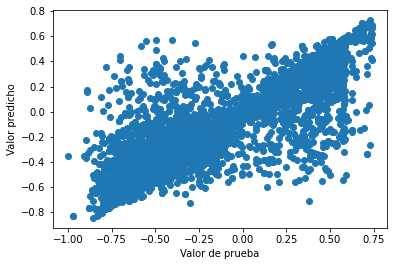

r2 score de BayesDel_noAF_score: 0.7850252456132604


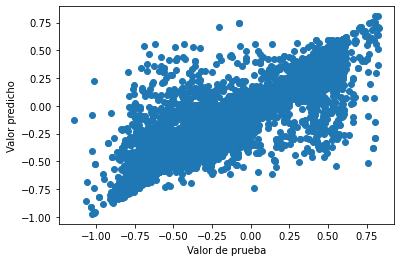

r2 score de ClinPred_score: 0.7853039647277329


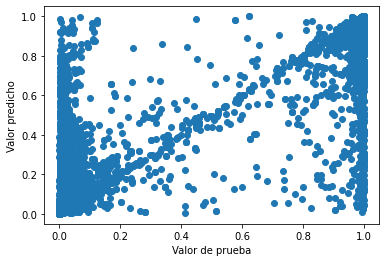

r2 score de LIST-S2_score: 0.6115211490346071


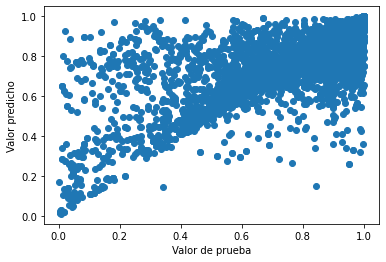

r2 score de DANN_score: 0.6226322472673753


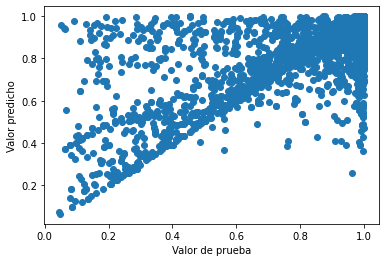

r2 score de fathmm-MKL_coding_score: 0.661795772680829


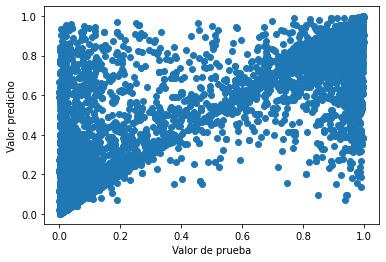

r2 score de fathmm-XF_coding_score: 0.7219809086472907


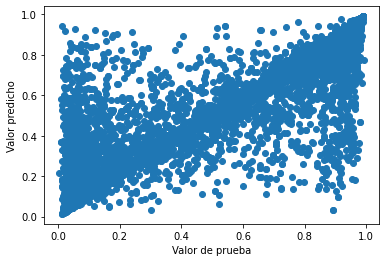

r2 score de GenoCanyon_score: 0.7167672264101882


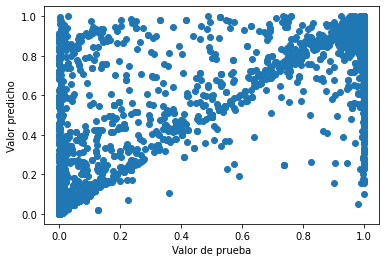

r2 score de integrated_fitCons_score: 0.7669319114336991


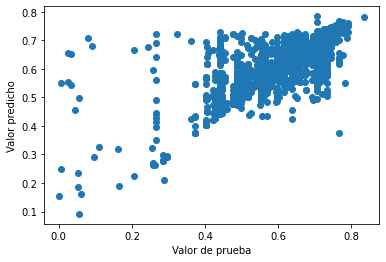

r2 score de GM12878_fitCons_score: 0.8035870134689153


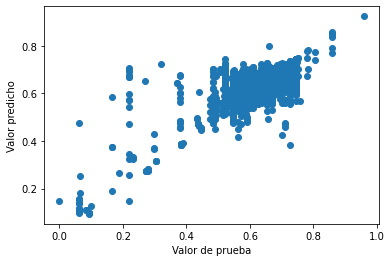

r2 score de H1-hESC_fitCons_score: 0.7228760191958756


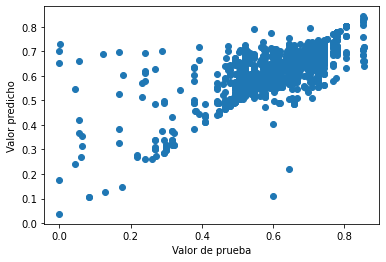

r2 score de HUVEC_fitCons_score: 0.7714686402814374


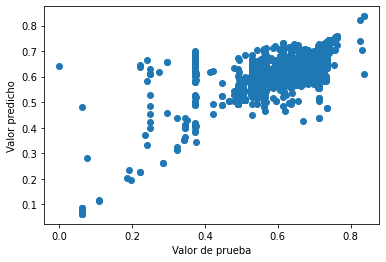

r2 score de LRT_score_reverted: 0.5602700648628722


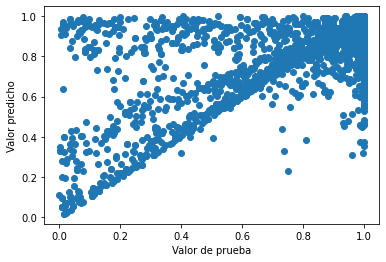

<Figure size 432x288 with 0 Axes>

In [7]:
models = {}
r2scores = {}

for score in tqdm(scores):
    
    tmp_df = df[columns+[score]].dropna().sort_values(by=score)
    X_tmp = tmp_df[columns]
    y_tmp = tmp_df[[score]]

    X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X_tmp, y_tmp, random_state=1, test_size=0.2)
    
    features_tmp = columns
    clf_tmp = RandomForestRegressor(max_depth=None, random_state=0)
    clf_tmp.fit(X_train_tmp, y_train_tmp)

    y_pred_tmp = clf_tmp.predict(X_test_tmp)
                    
    print("r2 score de " + score + ":",r2_score(y_test_tmp, y_pred_tmp))
    
    plt.scatter(y_test_tmp, y_pred_tmp)
    plt.xlabel('Valor de prueba')
    plt.ylabel('Valor predicho')
    plt.show()                    
    plt.savefig(fname="imgs/scatters/with_ohe/"+score)

    models[score] = clf_tmp    
    r2scores[score] = r2_score(y_test_tmp, y_pred_tmp)

¿Cuáles son los modelos que han obtenido un r2_score mayor a 0.75?

In [8]:
print([i for i in r2scores.keys() if r2scores[i] > 0.75])

['FATHMM_score', 'PROVEAN_score', 'MetaSVM_score', 'MetaLR_score', 'REVEL_score', 'MVP_score', 'MPC_score', 'DEOGEN2_score', 'BayesDel_addAF_score', 'BayesDel_noAF_score', 'ClinPred_score', 'integrated_fitCons_score', 'GM12878_fitCons_score', 'HUVEC_fitCons_score']


¿Cuáles son los modelos que han obtenido un r2_score mayor a 0.85?

In [9]:
print([i for i in r2scores.keys() if r2scores[i] > 0.85])

[]


# Modelos utilizando Bayes, ClinPred

## Con los aminoácidos

Matriz de confusión, sin normalizar
[[6789   55]
 [  77 3477]]
Matriz de confusión normalizada
[[0.99196376 0.00803624]
 [0.02166573 0.97833427]]


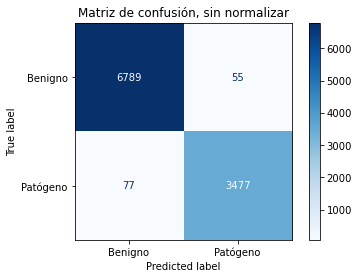

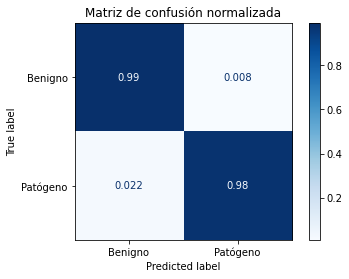

Ranking de características:
1. columna ClinPred_score (0.312914)
2. columna BayesDel_addAF_score (0.308122)
3. columna BayesDel_noAF_score (0.271637)
4. columna hg19_pos(1-based) (0.020671)
5. columna aaref_R (0.006715)
6. columna aaalt_W (0.005200)
7. columna aaref_C (0.003967)
8. columna aaalt_C (0.003520)
9. columna hg19_chr_17 (0.003081)
10. columna hg19_chr_8 (0.003057)
11. columna aaref_G (0.002445)
12. columna hg19_chr_2 (0.002252)
13. columna hg19_chr_20 (0.002108)
14. columna aaalt_I (0.001723)
15. columna hg19_chr_16 (0.001635)
16. columna aaref_V (0.001633)
17. columna alt_T (0.001621)
18. columna hg19_chr_19 (0.001604)
19. columna alt_A (0.001581)
20. columna ref_C (0.001569)
21. columna hg19_chr_1 (0.001569)
22. columna ref_G (0.001559)
23. columna alt_G (0.001301)
24. columna aaref_A (0.001297)
25. columna hg19_chr_3 (0.001283)
26. columna aaalt_A (0.001231)
27. columna aaalt_N (0.001185)
28. columna hg19_chr_7 (0.001142)
29. columna ref_T (0.001134)
30. columna alt_C (0.

In [10]:
refs = [x for x in df.columns if 'ref' in x and x != 'ref_code' and x != 'aaref_code' and x != 'ref' and x != 'aaref']
alts = [x for x in df.columns if 'alt' in x and x != 'alt_code' and x != 'aaalt_code' and x != 'alt' and x != 'aaalt']
chrs = [x for x in df.columns if 'hg19_chr' in x and x != 'hg19_chr']

for_model_5 = chrs + ['hg19_pos(1-based)'] +  refs + alts + ['ClinPred_score','BayesDel_addAF_score','BayesDel_noAF_score','patho']

tmp_df = df[for_model_5].copy().dropna()
if 'patho' in for_model_5:
    for_model_5.remove("patho")
    
X_5 = tmp_df[for_model_5]
y_5 = tmp_df[['patho']]

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=1, test_size=0.3)

features_5 = X_5.columns

clf_5 = RandomForestClassifier(max_depth=200, random_state=0)
clf_5.fit(X_train_5, y_train_5)

y_pred_5 = clf_5.predict(X_test_5)

titles_options = [("Matriz de confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_5, X_test_5, y_test_5,
                                 display_labels=['Benigno','Patógeno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.savefig(fname="imgs/confusion_matrix/model5_"+title)

    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

importances_5 = clf_5.feature_importances_
indices_5 = np.argsort(importances_5)[::-1]

# Print the feature ranking
print("Ranking de características:")

for f in range(0,len(features_5)):
    print("%d. columna %s (%f)" % (f + 1, features_5[indices_5[f]], importances_5[indices_5[f]]))

Los resultados de este modelo son muy buenos. Hay que hacer una prueba posterior para comprobar si utilizando la entrada de los modelos anteriores realmente funciona.

## Sin los aminoácidos

Matriz de confusión, sin normalizar
[[4565   23]
 [  58 2286]]
Matriz de confusión normalizada
[[0.99498692 0.00501308]
 [0.02474403 0.97525597]]


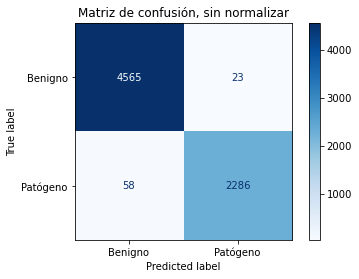

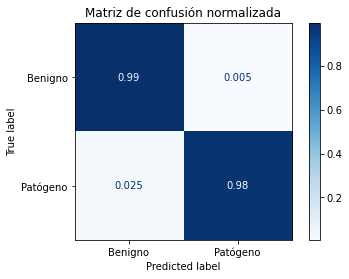

Ranking de características:
1. columna ClinPred_score (0.383142)
2. columna BayesDel_addAF_score (0.305171)
3. columna BayesDel_noAF_score (0.245150)
4. columna hg19_pos(1-based) (0.027959)
5. columna hg19_chr_17 (0.003452)
6. columna hg19_chr_8 (0.003407)
7. columna hg19_chr_2 (0.002428)
8. columna hg19_chr_20 (0.002152)
9. columna hg19_chr_16 (0.001924)
10. columna hg19_chr_19 (0.001785)
11. columna hg19_chr_1 (0.001701)
12. columna ref_C (0.001653)
13. columna alt_T (0.001597)
14. columna ref_G (0.001462)
15. columna alt_C (0.001443)
16. columna hg19_chr_6 (0.001343)
17. columna alt_A (0.001338)
18. columna alt_G (0.001253)
19. columna ref_A (0.001178)
20. columna ref_T (0.001142)
21. columna hg19_chr_3 (0.001133)
22. columna hg19_chr_7 (0.001064)
23. columna hg19_chr_11 (0.001000)
24. columna hg19_chr_13 (0.000871)
25. columna hg19_chr_9 (0.000839)
26. columna hg19_chr_5 (0.000772)
27. columna hg19_chr_4 (0.000695)
28. columna hg19_chr_23 (0.000601)
29. columna hg19_chr_12 (0.00054

In [11]:
refs = [x for x in df.columns if 'ref' in x and x != 'ref_code' and x != 'aaref_code' and x != 'ref' and 'aaref' not in x]
alts = [x for x in df.columns if 'alt' in x and x != 'alt_code' and x != 'aaalt_code' and x != 'alt' and 'aaalt' not in x]
chrs = [x for x in df.columns if 'hg19_chr' in x and x != 'hg19_chr']

for_model_6 = chrs + ['hg19_pos(1-based)'] +  refs + alts + ['ClinPred_score','BayesDel_addAF_score','BayesDel_noAF_score','patho']

tmp_df = df[for_model_6].copy().dropna()
if 'patho' in for_model_6:
    for_model_6.remove("patho")
    
X_6 = tmp_df[for_model_6]
y_6 = tmp_df[['patho']]

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, random_state=1, test_size=0.2)

features_6 = X_6.columns

clf_6 = RandomForestClassifier(max_depth=200, random_state=0)
clf_6.fit(X_train_6, y_train_6)

y_pred_6 = clf_6.predict(X_test_6)

titles_options = [("Matriz de confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_6, X_test_6, y_test_6,
                                 display_labels=['Benigno','Patógeno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.savefig(fname="imgs/confusion_matrix/model6_"+title)

    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

importances_6 = clf_6.feature_importances_
indices_6 = np.argsort(importances_6)[::-1]

# Print the feature ranking
print("Ranking de características:")

for f in range(0,len(features_6)):
    print("%d. columna %s (%f)" % (f + 1, features_6[indices_6[f]], importances_6[indices_6[f]]))

Los resultados son prácticamente similares. Realmente no merece la pena tener un modelo alternativo utilizando los aminoácidos si no producen una mejora significativa en los resultados.

# Prueba en Pipeline del modelo con aminoácidos

En esta prueba, se cogerán los modelos preentrenados de Bayes, ClinPred, Fathmm y Provean para calcular sus scores y utilizarlo como entrada para el modelo con aminoácidos mostrado anteriormente.

In [12]:
bayesAdd = models['BayesDel_addAF_score']
bayesNo = models['BayesDel_noAF_score']
clinPred = models['ClinPred_score']

In [13]:
refs = [x for x in df.columns if 'ref' in x and x != 'ref_code' and x != 'aaref_code' and x != 'ref' and x != 'aaref']
alts = [x for x in df.columns if 'alt' in x and x != 'alt_code' and x != 'aaalt_code' and x != 'alt' and x != 'aaalt']
chrs = [x for x in df.columns if 'hg19_chr' in x and x != 'hg19_chr']

cols = chrs + ['hg19_pos(1-based)'] + refs + alts + ['patho']

tmp_df = df[cols].copy().dropna()
if 'patho' in cols:
    cols.remove("patho")
X_7 = tmp_df[cols]
y_7 = tmp_df[['patho']]

# Creamos una copia para guardar los scores predichos por los modelos
results_df = X_7.copy()

# Predecimos los scores y los almacenamos en nuestro dataframe
results_df['BayesDel_addAF_score'] = bayesAdd.predict(X_7)
results_df['BayesDel_noAF_score'] = bayesNo.predict(X_7)
results_df['ClinPred_score'] = clinPred.predict(X_7)

refs = [x for x in df.columns if 'ref' in x and x != 'ref_code' and x != 'aaref_code' and x != 'ref' and 'aaref' not in x]
alts = [x for x in df.columns if 'alt' in x and x != 'alt_code' and x != 'aaalt_code' and x != 'alt' and 'aaalt' not in x]
chrs = [x for x in df.columns if 'hg19_chr' in x and x != 'hg19_chr']

for_model_7 = chrs + ['hg19_pos(1-based)'] +  refs + alts + ['ClinPred_score','BayesDel_addAF_score','BayesDel_noAF_score']

results_df['prediction'] = clf_6.predict(results_df[for_model_7])

Matriz de confusión, sin normalizar
[[22194   434]
 [  442 11717]]
Matriz de confusión normalizada
[[0.98082022 0.01917978]
 [0.03635167 0.96364833]]


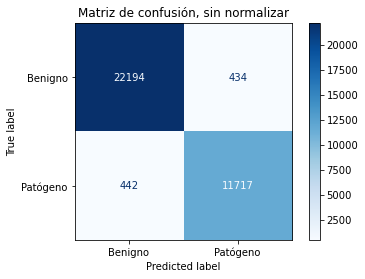

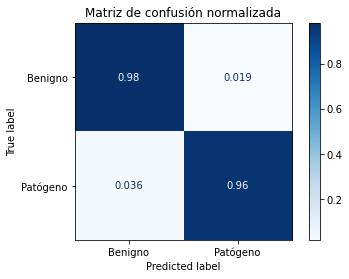

Ranking de características:
1. columna ClinPred_score (0.383142)
2. columna BayesDel_addAF_score (0.305171)
3. columna BayesDel_noAF_score (0.245150)
4. columna hg19_pos(1-based) (0.027959)
5. columna hg19_chr_17 (0.003452)
6. columna hg19_chr_8 (0.003407)
7. columna hg19_chr_2 (0.002428)
8. columna hg19_chr_20 (0.002152)
9. columna hg19_chr_16 (0.001924)
10. columna hg19_chr_19 (0.001785)
11. columna hg19_chr_1 (0.001701)
12. columna ref_C (0.001653)
13. columna alt_T (0.001597)
14. columna ref_G (0.001462)
15. columna alt_C (0.001443)
16. columna hg19_chr_6 (0.001343)
17. columna alt_A (0.001338)
18. columna alt_G (0.001253)
19. columna ref_A (0.001178)
20. columna ref_T (0.001142)
21. columna hg19_chr_3 (0.001133)
22. columna hg19_chr_7 (0.001064)
23. columna hg19_chr_11 (0.001000)
24. columna hg19_chr_13 (0.000871)
25. columna hg19_chr_9 (0.000839)
26. columna hg19_chr_5 (0.000772)
27. columna hg19_chr_4 (0.000695)
28. columna hg19_chr_23 (0.000601)
29. columna hg19_chr_12 (0.00054

In [14]:
titles_options = [("Matriz de confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_6, results_df[for_model_7], y_7,
                                 display_labels=['Benigno','Patógeno'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.savefig(fname="imgs/confusion_matrix/model7_"+title)

    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

importances_7 = clf_6.feature_importances_
indices_7 = np.argsort(importances_7)[::-1]

# Print the feature ranking
print("Ranking de características:")

for f in range(0,len(for_model_7)):
    print("%d. columna %s (%f)" % (f + 1, for_model_7[indices_7[f]], importances_7[indices_7[f]]))

Este test ha sido realizado con todos los datos de nuestro dataframe inicial. Los resultados son bastante buenos, pero hay que tener siempre en cuenta que utilizar

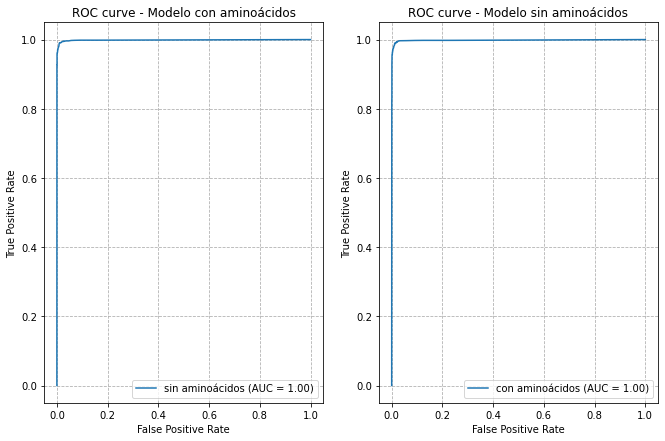

In [15]:
from sklearn.metrics import plot_roc_curve

fig, [ax_roc1, ax_roc2] = plt.subplots(1, 2, figsize=(11, 7))

plot_roc_curve(clf_6, X_test_6, y_test_6, ax=ax_roc1, name="sin aminoácidos")
plot_roc_curve(clf_5, X_test_5, y_test_5, ax=ax_roc2, name="con aminoácidos")

ax_roc1.grid(linestyle='--')
ax_roc2.grid(linestyle='--')

ax_roc1.set_title('ROC curve - Modelo con aminoácidos')
ax_roc2.set_title('ROC curve - Modelo sin aminoácidos')

plt.savefig(fname="imgs/confusion_matrix/models_roc_curve_OHE")

plt.legend()
plt.show()